In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(readr)
library(ggplot2)
library(forecast)

library(TTR)
library(dplyr)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")
    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "hotel-booking-demand"

In [2]:
# check if the file exit in the path
list.files(path = "../input/hotel-booking-demand")

[1] "hotel_bookings.csv"

In [3]:
# read data 
table = read.csv("../input/hotel-booking-demand/hotel_bookings.csv")

In [4]:
# check the head of the data
head(table)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Ma


     0      1 
115580   3810 

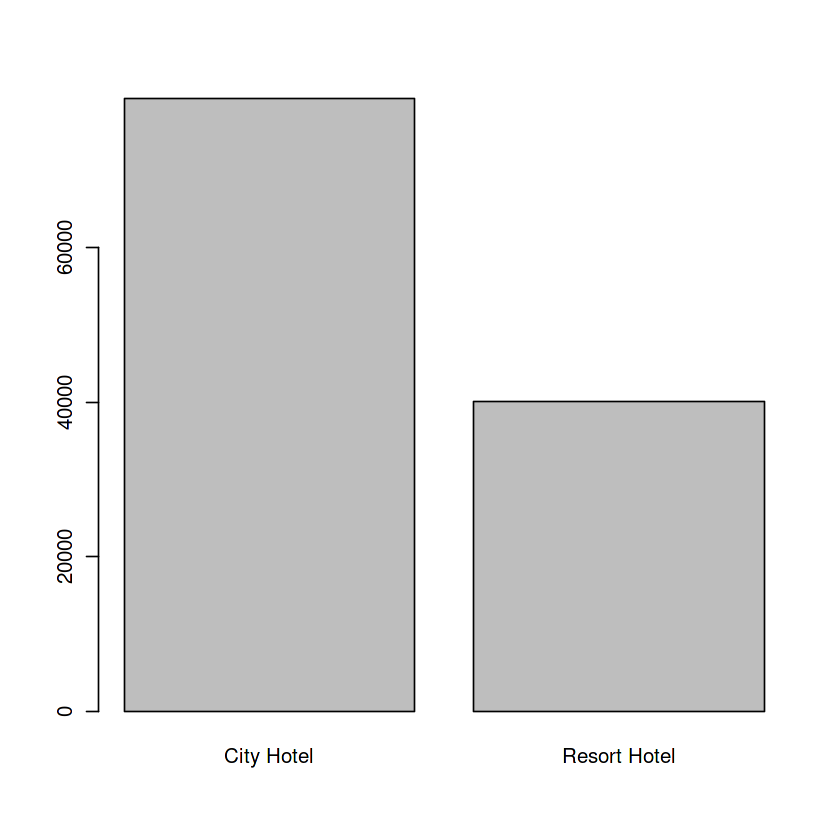

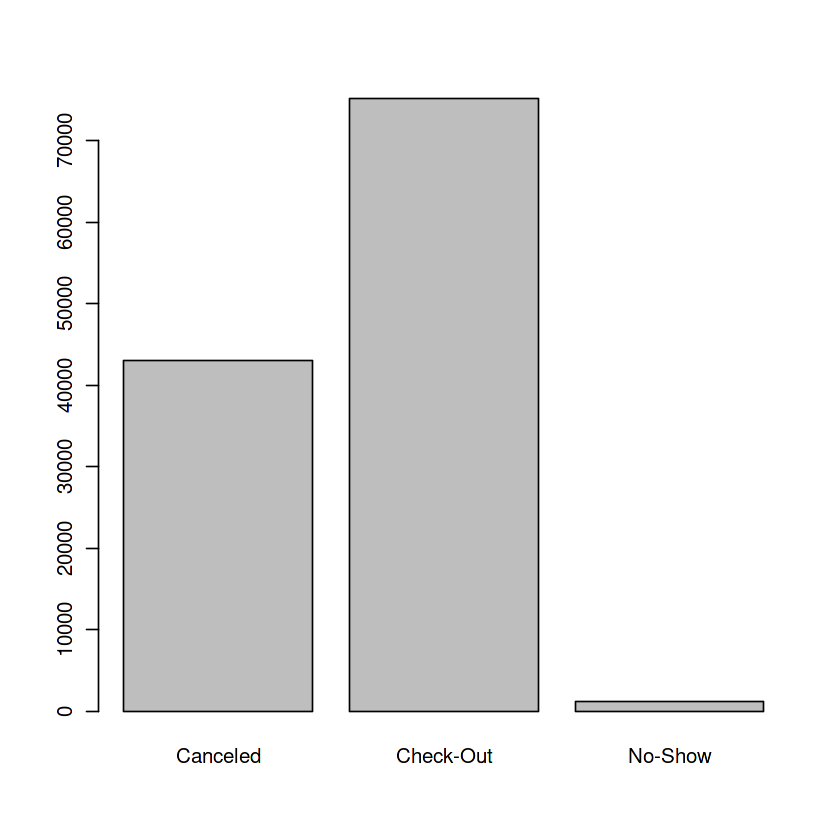

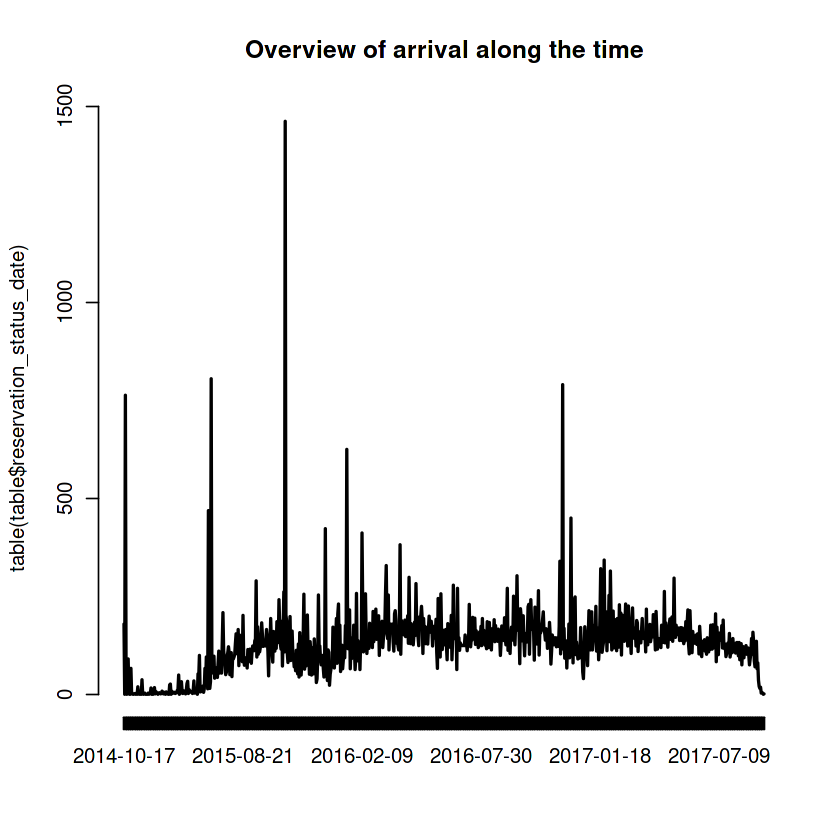

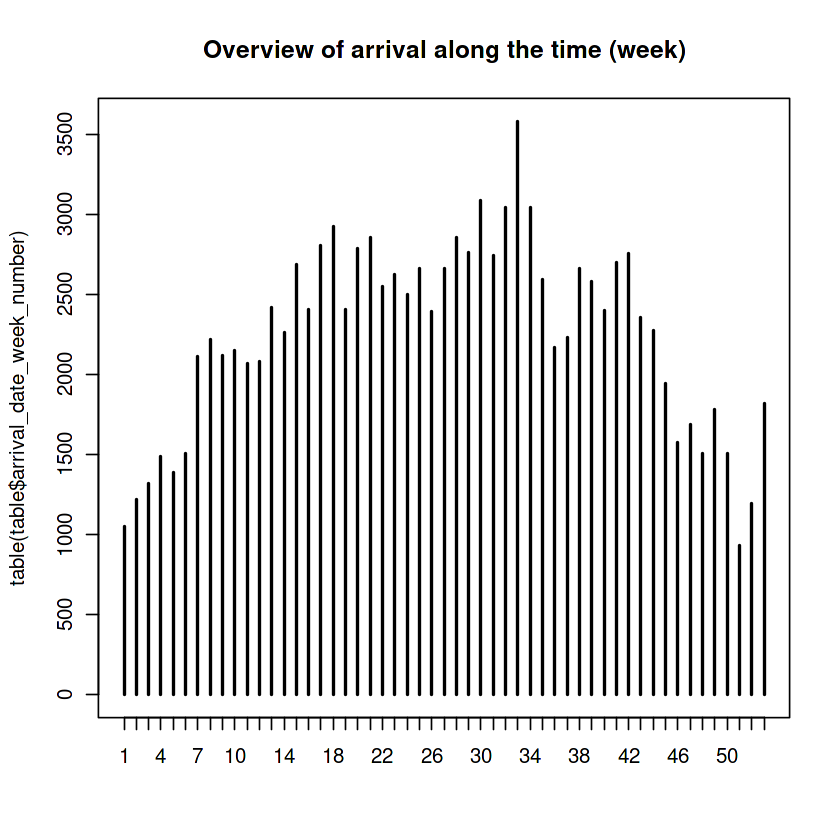

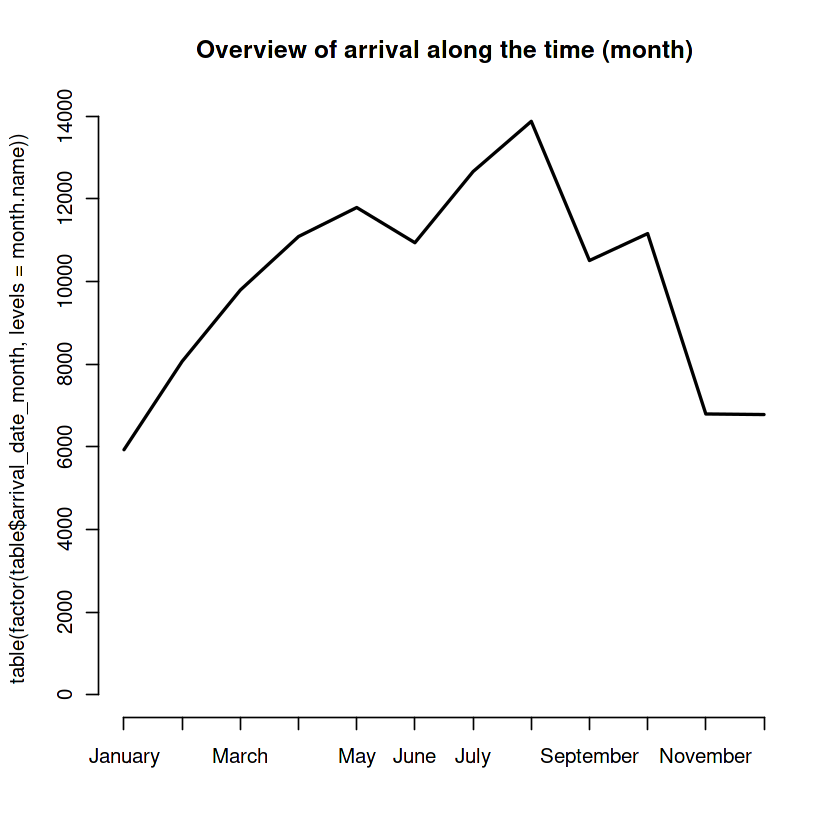

In [5]:
## data exploring

# overview about the data
summary(table)
table(table$is_repeated_guest)

# check the distritbution of different type of hotel
barplot(table(table$hotel))

# check the distribution of reservation_status
barplot(table(table$reservation_status))

# plot the count of arrivals along the time (date)
plot(table(table$reservation_status_date), type = 'l',main = 'Overview of arrival along the time' )

# plot the count of arrivals along the time (week), check the distribution along the time
plot(table(table$arrival_date_week_number), main = 'Overview of arrival along the time (week)')

#plot(table(table$arrival_date_month))
plot(table(factor(table$arrival_date_month, levels = month.name)), type = 'l', main = 'Overview of arrival along the time (month)')

,cancel_rate
,<dbl>
resort_hotel,0.2776335
city_hotel,0.4172696


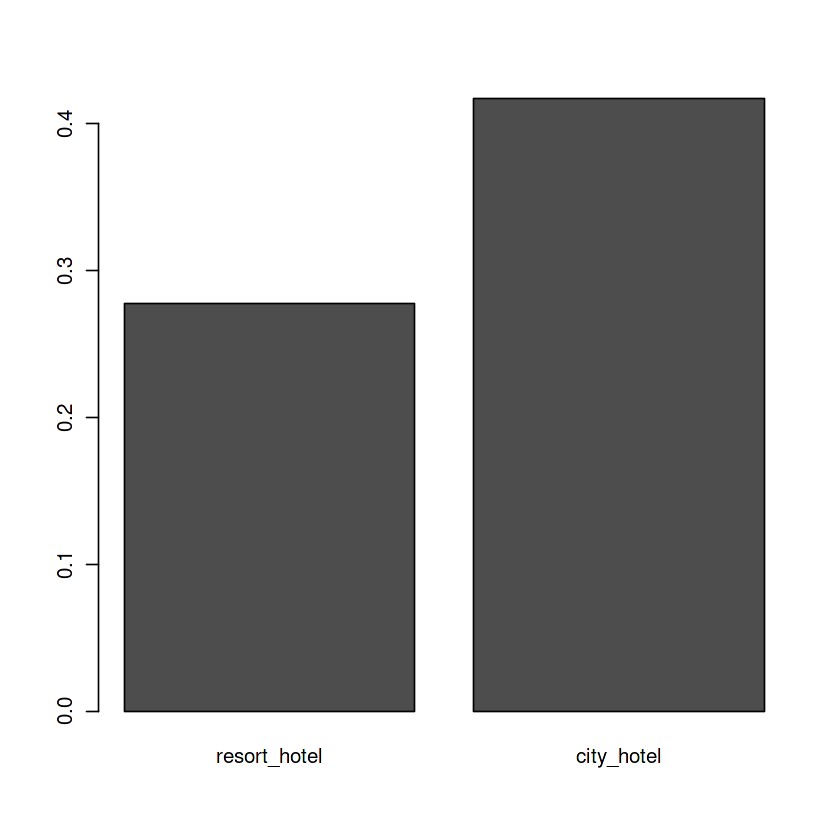

In [6]:
# cancel rate in different hotel type
resort = table[table$hotel == 'Resort Hotel',]
temp = table(resort$is_canceled)
resort_hotel = as.array(temp['1']/(temp['0']+ temp['1']))

city = table[table$hotel == 'City Hotel',]
temp = table(city$is_canceled)
city_hotel = as.array(temp['1']/(temp['0']+ temp['1']))


#as.data.frame(resort_hotel, city_hotel)
temp = as.data.frame(c(resort_hotel,city_hotel))
rownames(temp) = c('resort_hotel','city_hotel')
colnames(temp) = c('cancel_rate')
temp
barplot(as.matrix(t(temp)))

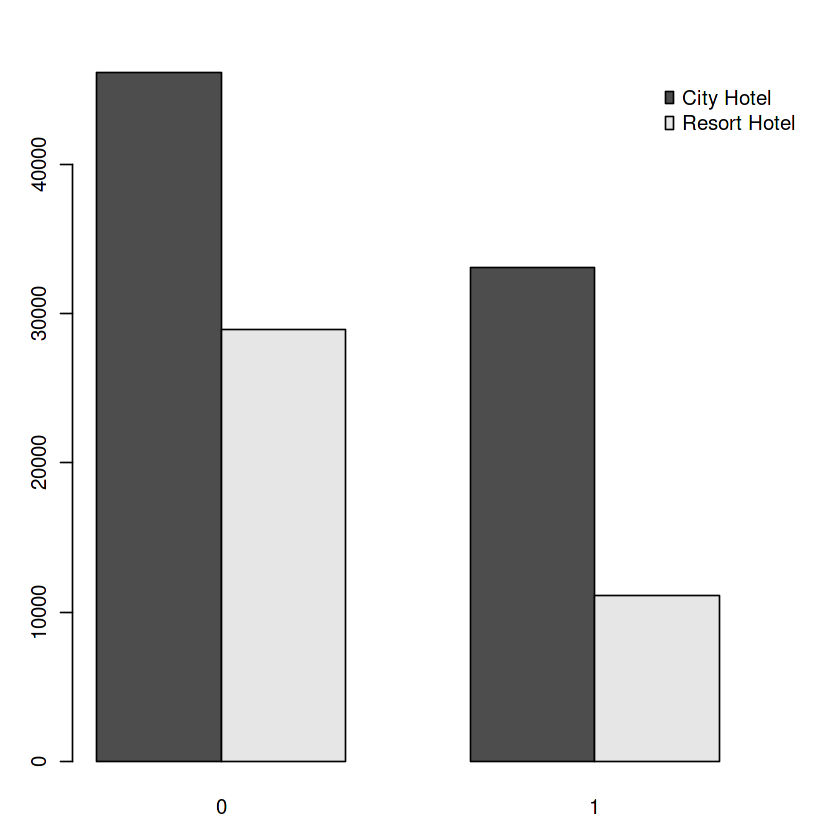

In [7]:
# number of cancle record in each type of hotel
par(mar=c(3,3,3,4))
barplot(table(table$hotel, table$is_canceled),beside = T, legend.text = T, 
        args.legend = list(x = "topright",box.lty = 0))

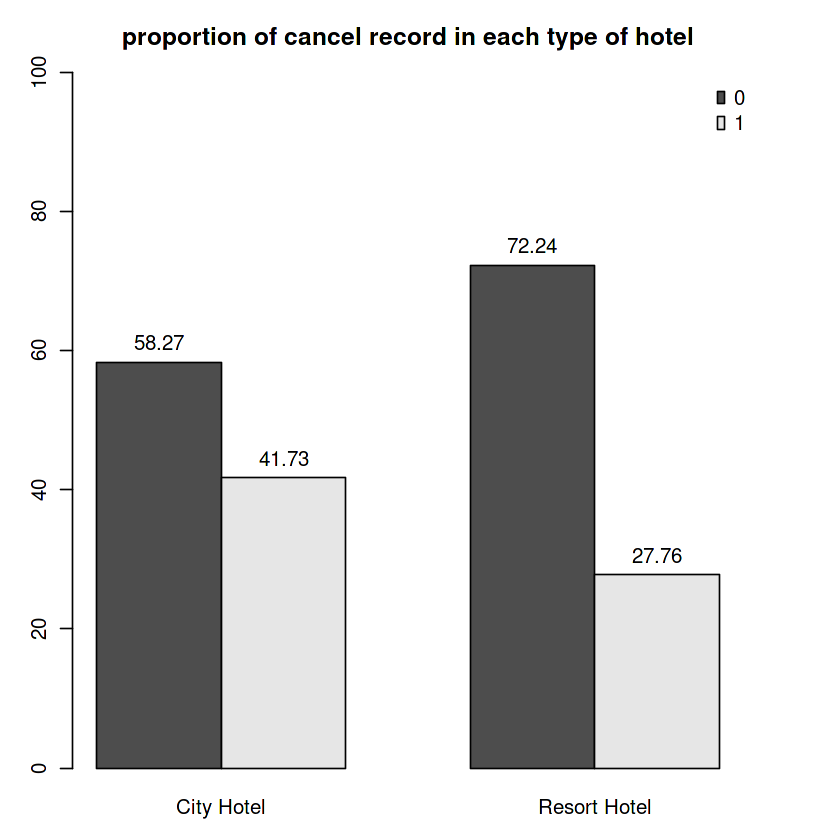

In [8]:
### proportion of cancel record in each type of hotel
par(mar=c(3,3,3,4))
df = proportions(table(table$is_canceled, table$hotel),2)*100

bp = barplot(df, main = 'proportion of cancel record in each type of hotel', 
        legend.text = T, beside = T, ylim = c(0, 100),
        args.legend = list(x = "topright",box.lty = 0))

 text(bp, round(df, 2), round(df, 2),cex=1,pos=3)

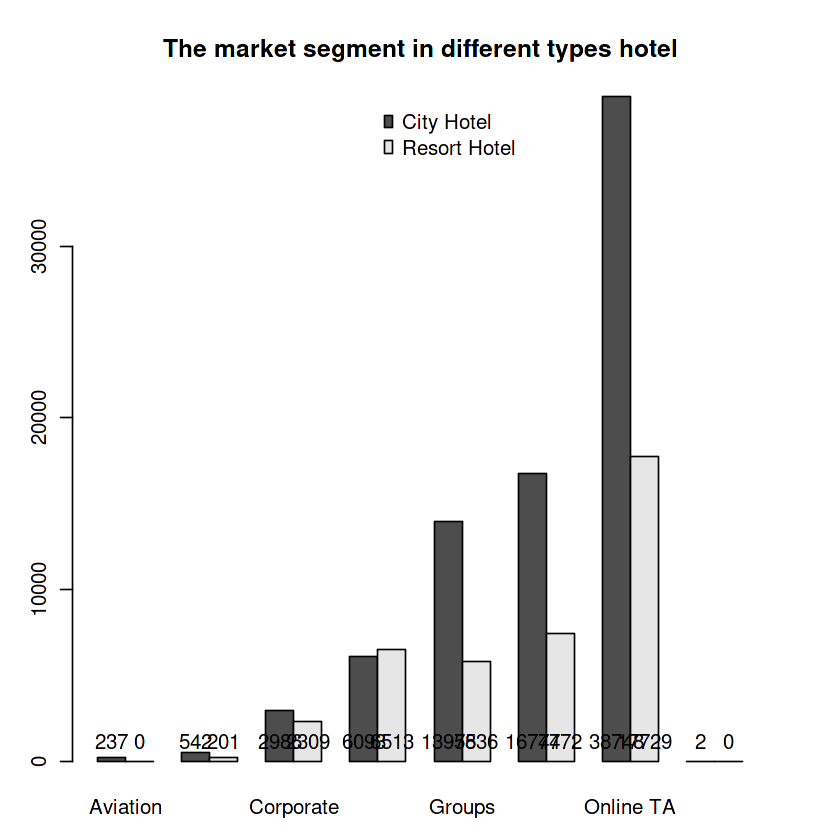

In [9]:
par(mar=c(3,3,4,3))
df = table(table$hotel, table$market_segment)
bp = barplot(df, main = 'The market segment in different types hotel', legend.text = T, beside = T,
        args.legend = list(x = "top",box.lty = 0))
 text(bp, 0, round(df, 2),cex=1,pos=3)

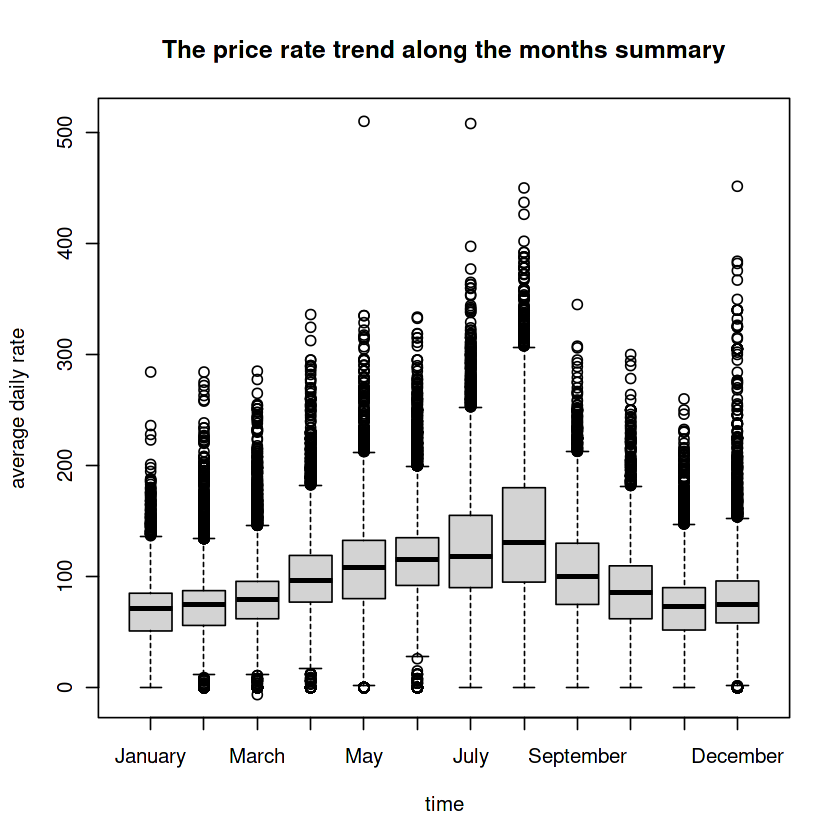

In [10]:
# the dairy rate of hotel along the month (from 3 year records)
d = table[table$adr < 4000, ]
plot(d$adr ~ factor(d$arrival_date_month, levels = month.name), main = 'The price rate trend along the months summary', 
     xlab = 'time', ylab = 'average daily rate')

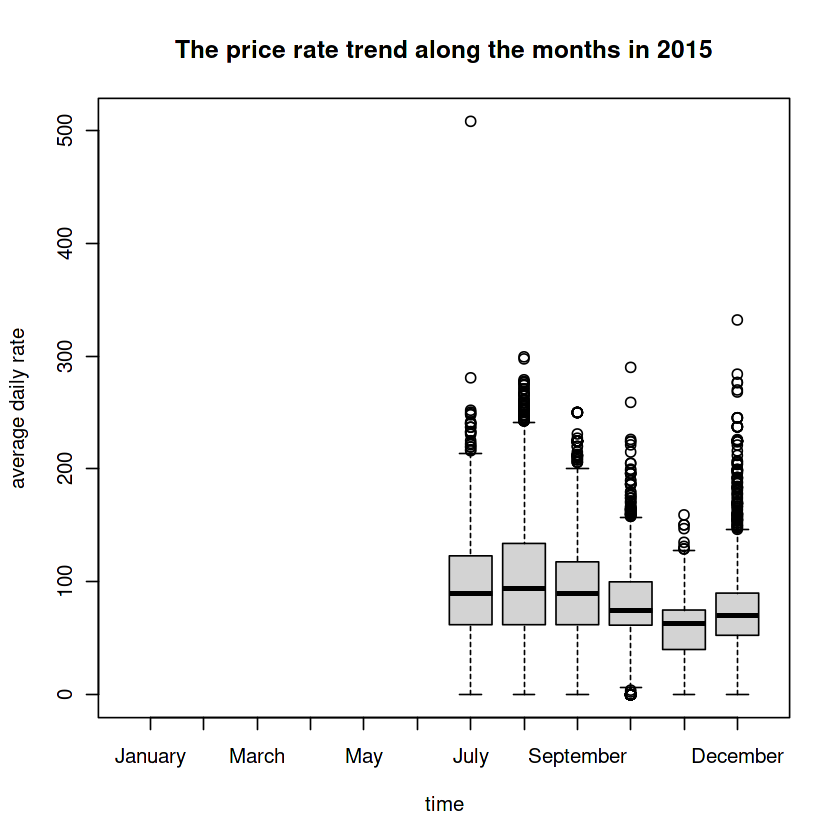

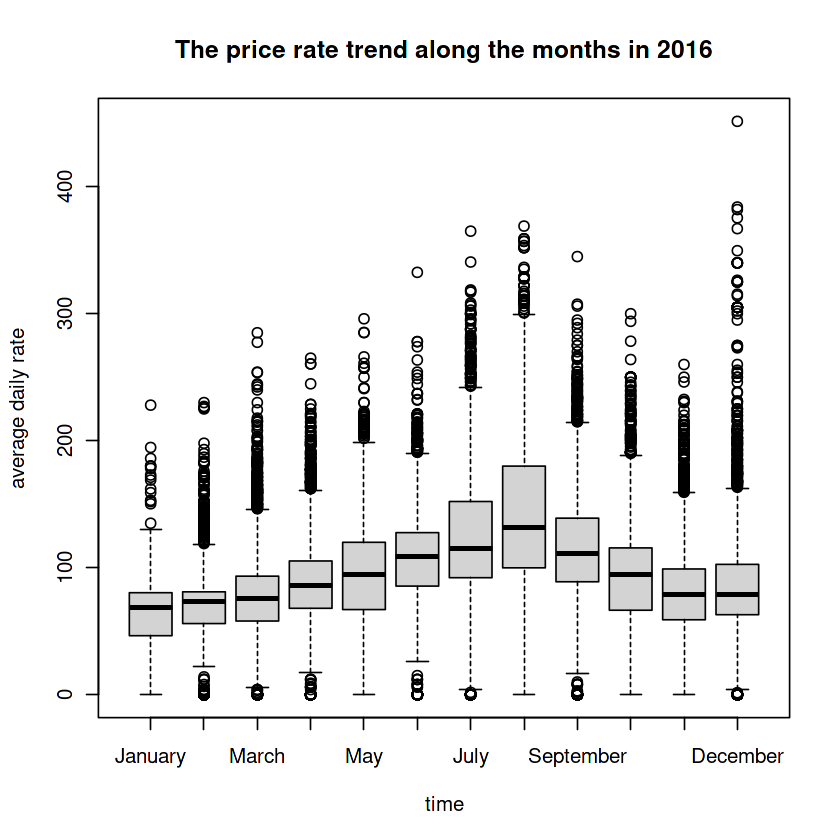

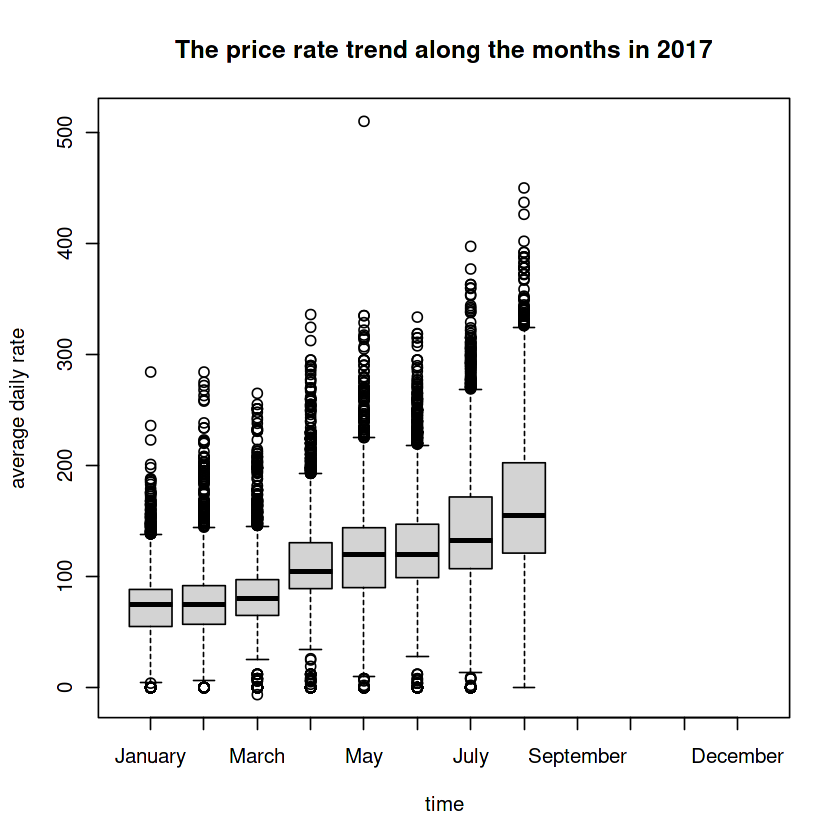

In [11]:
# the daily rate along the months (each year)
d = table[table$adr < 4000 & table$arrival_date_year == 2015, ]
plot(d$adr ~ factor(d$arrival_date_month, levels = month.name), main = 'The price rate trend along the months in 2015', 
     xlab = 'time', ylab = 'average daily rate')
d = table[table$adr < 4000 & table$arrival_date_year == 2016, ]
plot(d$adr ~ factor(d$arrival_date_month, levels = month.name), main = 'The price rate trend along the months in 2016', 
     xlab = 'time', ylab = 'average daily rate')
d = table[table$adr < 4000 & table$arrival_date_year == 2017, ]
plot(d$adr ~ factor(d$arrival_date_month, levels = month.name), main = 'The price rate trend along the months in 2017', 
     xlab = 'time', ylab = 'average daily rate')

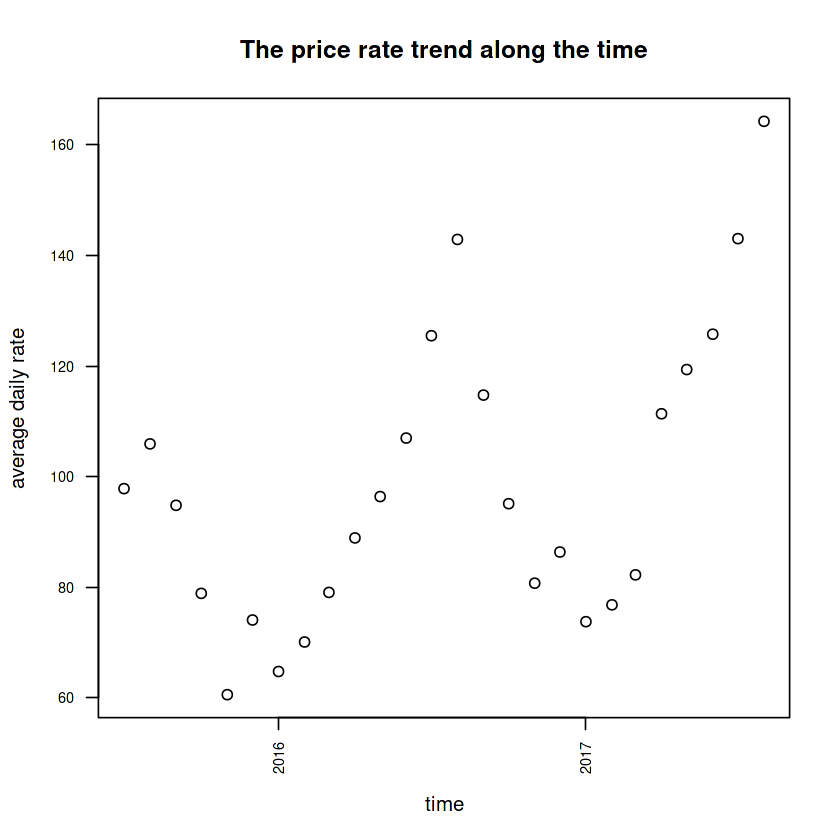

In [12]:
# combine all the daily rate along 3 year, step of a month
#table$year_month = paste(table$arrival_date_year, '-', as.numeric(factor(table$arrival_date_month, levels = month.name)))
table$date = as.Date(paste(table$arrival_date_year, as.numeric(factor(table$arrival_date_month, levels = month.name)), "01", sep="-"), "%Y-%m-%d")
df = table[table$adr < 4000, ]
d = aggregate(adr ~ date, table, mean)

plot(d$adr ~ d$date, main = 'The price rate trend along the time', las = 2,cex.axis=0.7,
 xlab = 'time', ylab = 'average daily rate')

In [13]:
## focast daily rate in future	

# split dataset
split1<- sample(c(rep(0, 0.7 * nrow(d)), rep(1, 0.3 * nrow(d))))
train <- d[split1 == 0, ]     
test <- d[split1== 1, ] 

# time series data
tsData = ts(d$adr, start = c(2015, 7), frequency = 12)

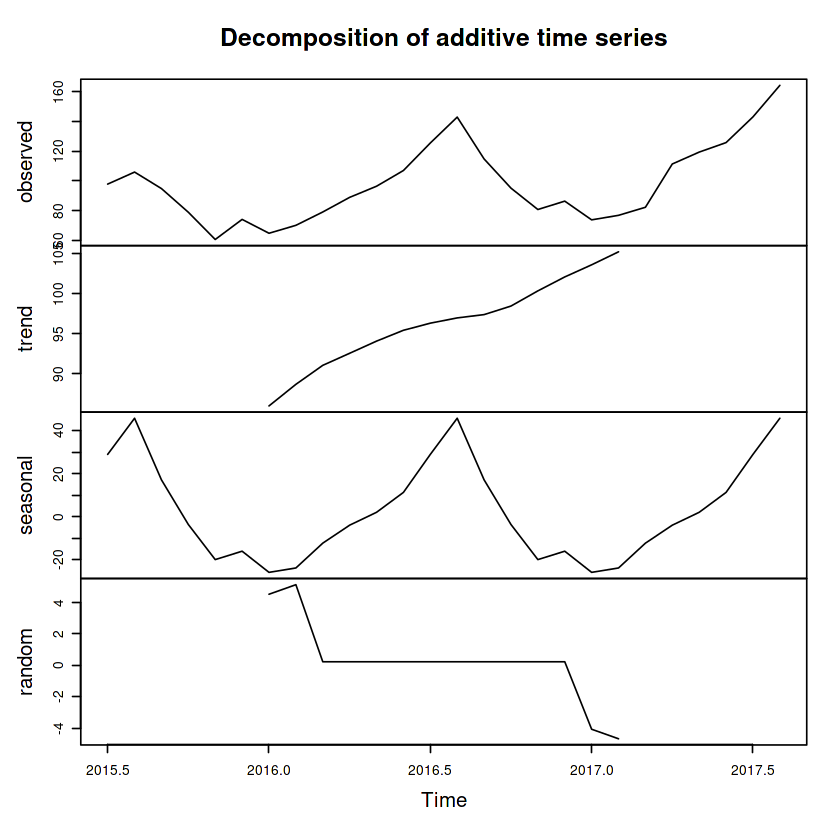

In [14]:
#check each components in the time series data
components.ts = decompose(tsData)
plot(components.ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,,,,,,97.83432,105.92289,94.81866,78.89543,60.58025,74.07924
2016,64.76766,70.10227,79.06933,88.91892,96.39929,106.97731,125.48454,142.89359,114.74957,95.11179,80.73758,86.37025
2017,73.77726,76.82401,82.24266,111.37090,119.36536,125.75760,143.03777,164.24837,,,,


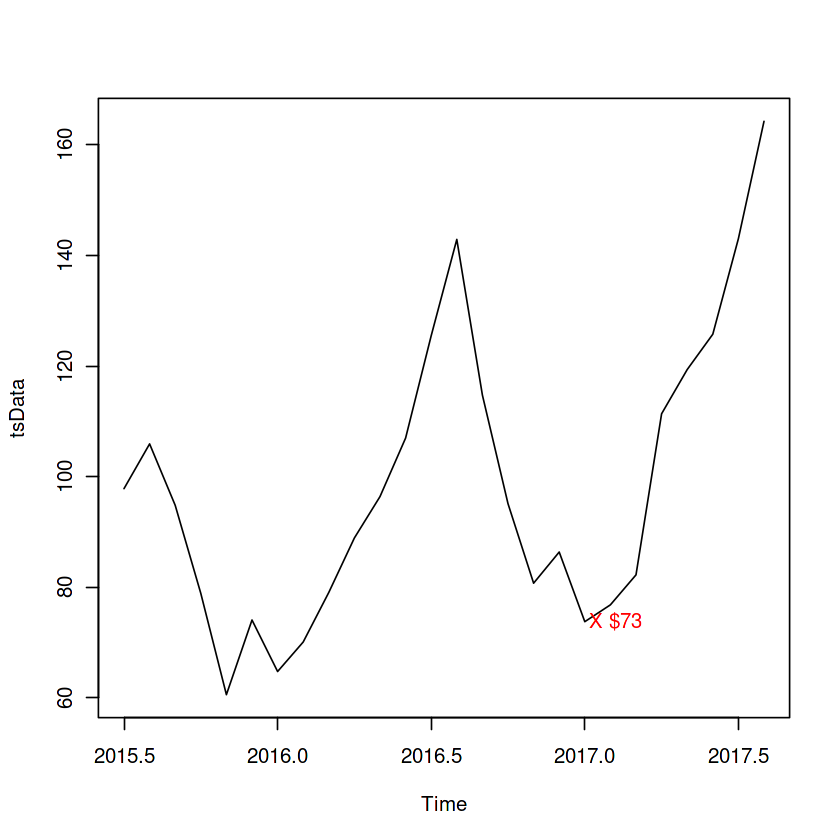

In [15]:
# plot the time series data
tsData
plot(tsData)
text(x = '2017.1', y = 73.77726, 'X $73', col = 'red')
abline(a = 2017.1, b =73.77726 )

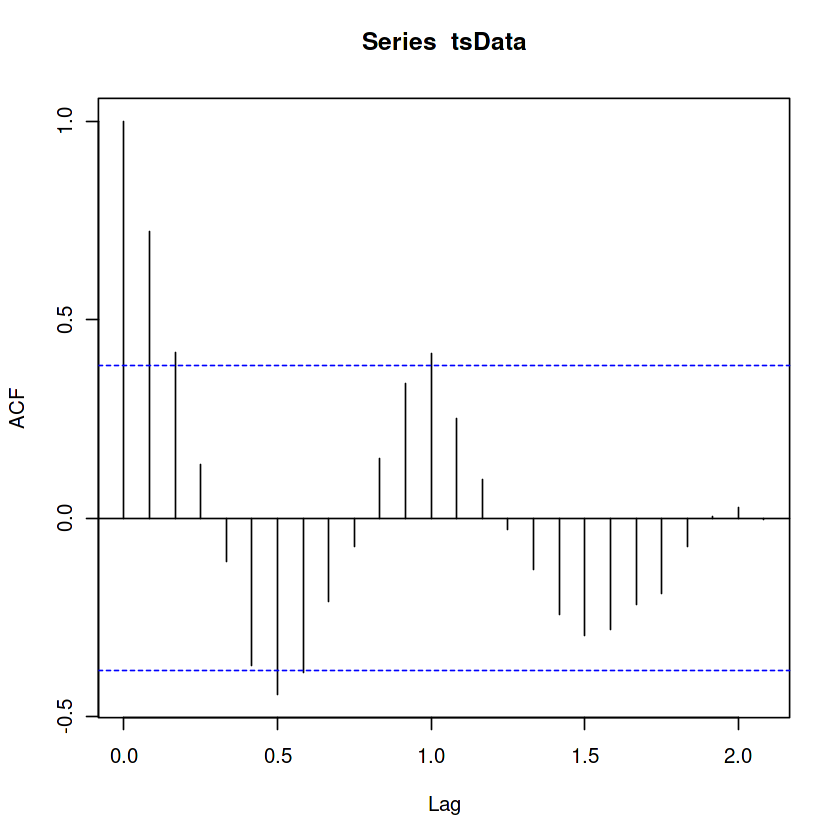

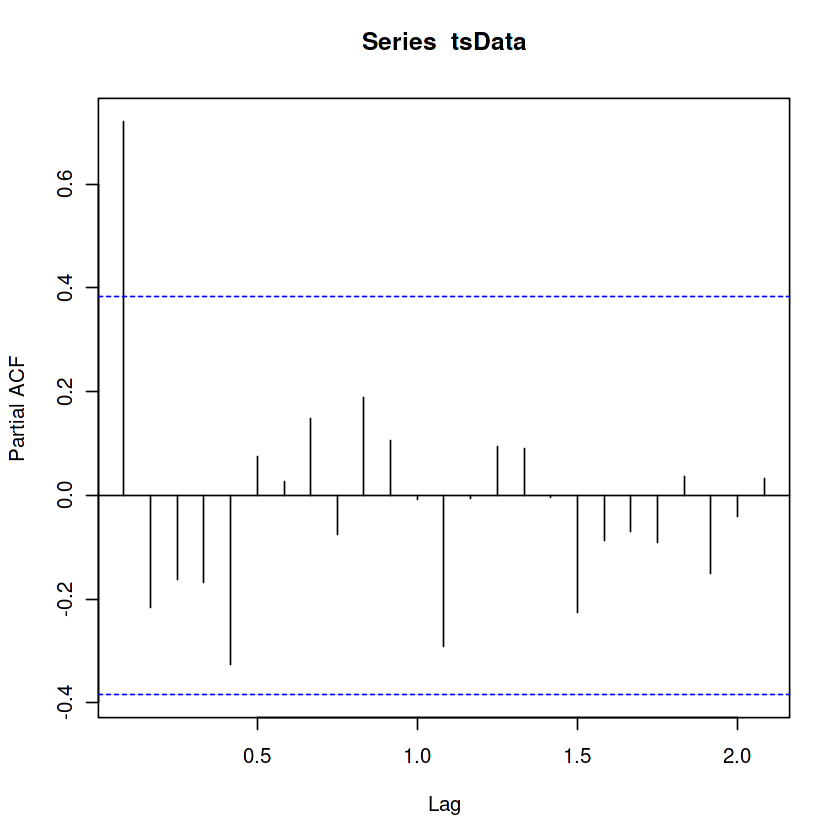

In [16]:
# decide to build forcasting model
acf(tsData,lag.max=34) 
pacf(tsData, lag.max=34)

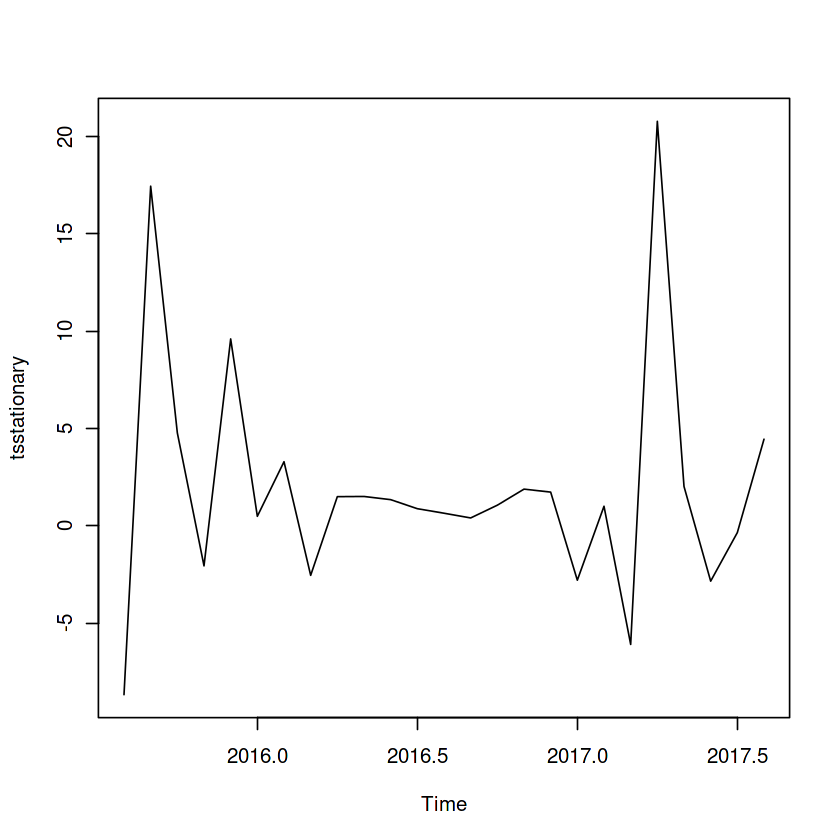

In [17]:
# remove the seaosnal components off from data
timeseriescomponents = components.ts
timeseriesseasonallyadjusted <- tsData- timeseriescomponents$seasonal
tsstationary <- diff(timeseriesseasonallyadjusted, differences=1)
plot(tsstationary)

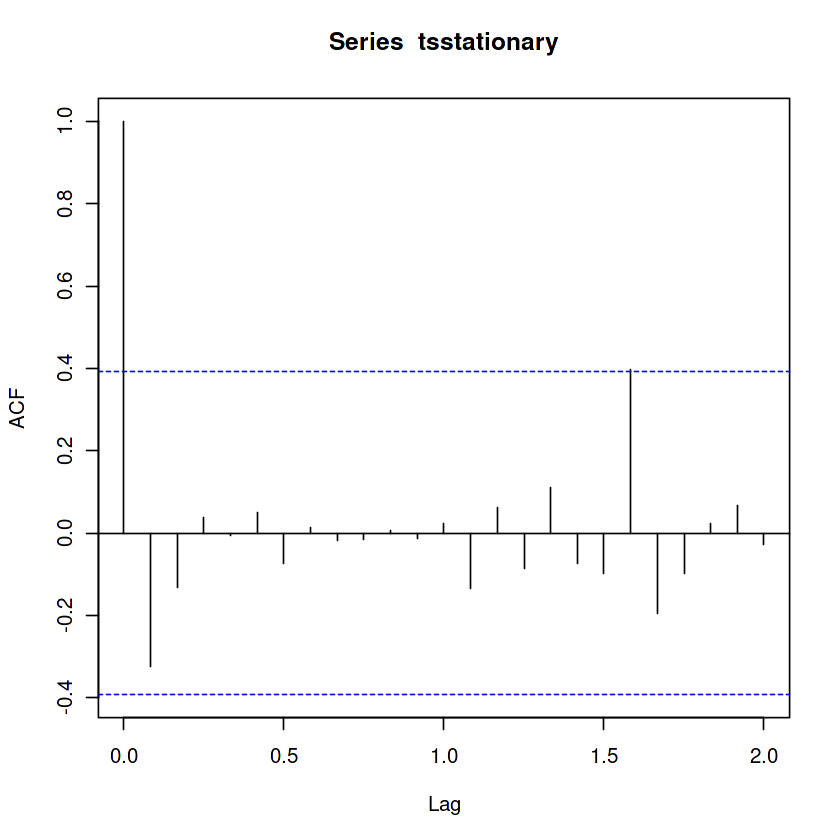

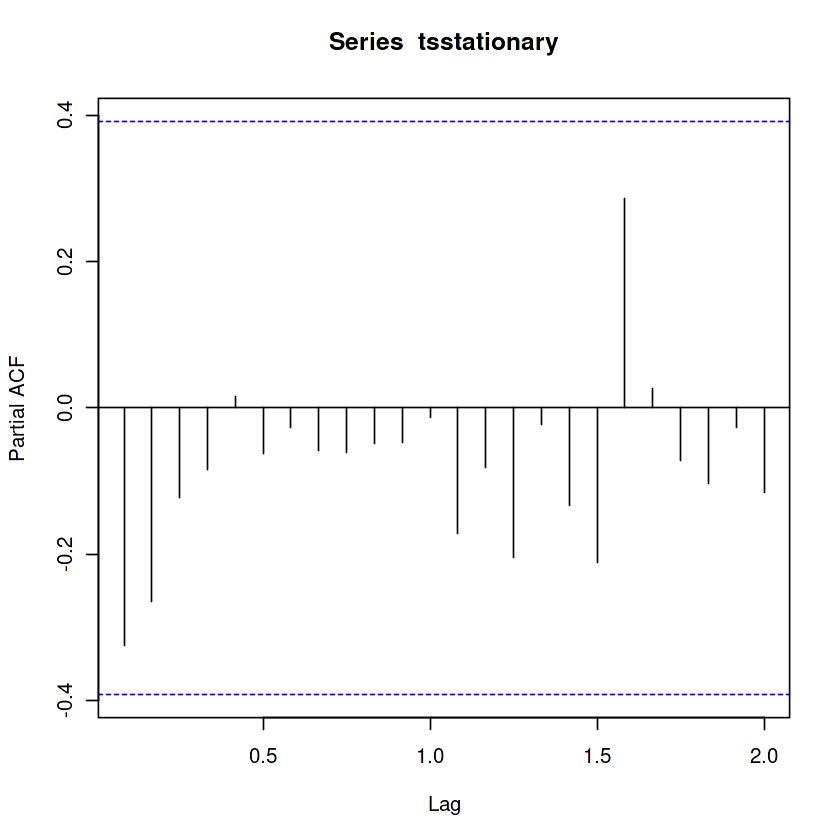

In [18]:
# decide to build forcasting model
acf(tsstationary, lag.max=34)
pacf(tsstationary, lag.max=34)

In [19]:
# fit arima model
library('zoo')
fitARIMA <- arima(tsData, order=c(1,1,1),seasonal = list(order = c(1,0,0), period = 12),method="ML")
library(lmtest)
coeftest(fitARIMA)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  -0.24040    0.81716 -0.2942    0.7686    
ma1   0.38681    0.74369  0.5201    0.6030    
sar1  0.81968    0.10041  8.1630 3.267e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [20]:
# predict next year hotel dariy price rate
predict(fitARIMA,n.ahead = 5)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,,,,,142.0815,125.7679,114.0377,118.6422
2018,108.3229,,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,,,,,8.072856,12.280984,15.208401,17.691766
2018,19.859635,,,,,,,,,,,


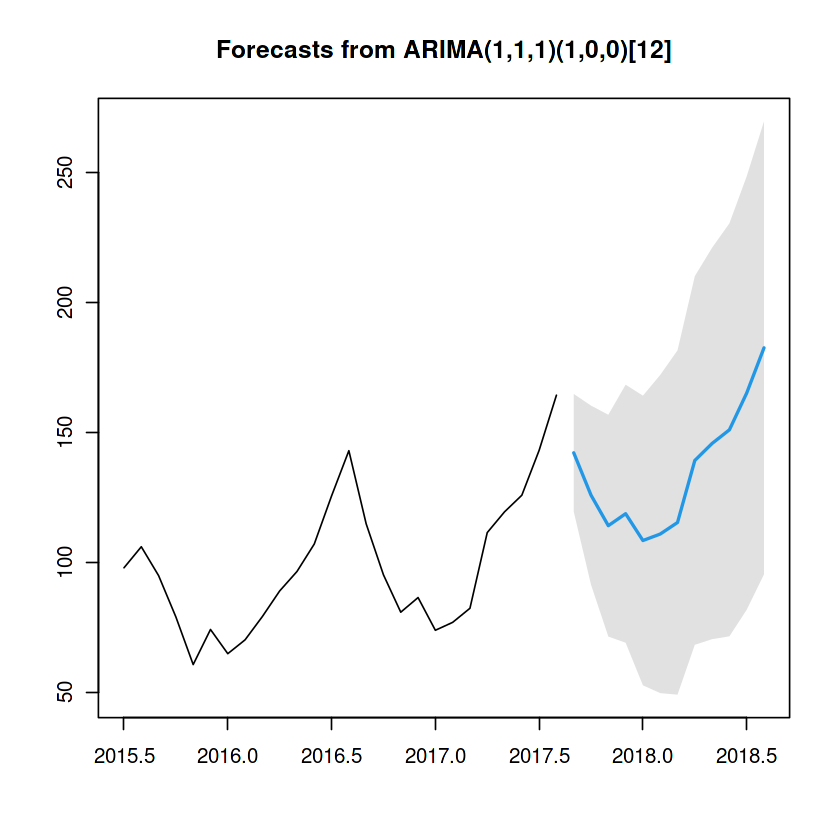

In [21]:
# plot the forcasting results
library('forecast')
futurVal <- forecast(fitARIMA,h=12, level=c(99.5))
plot(futurVal)